In [449]:
# Esta celda actúa sobre la libreta, y permite que se aproveche mejor el espacio.
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95%}</style>"))
import sys
print(sys.executable) 
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
from sklearn import preprocessing

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
El codigo Python de este cuaderno está oculto para facilitar la lectura.
Para mostrar/ocultar el código, haz click <a href="javascript:code_toggle()">aquí.</a>.''')

c:\users\48259328\appdata\local\programs\python\python38\python.exe


In [450]:
import pandas as pd
#df_alg=pd.read_csv('output/experimento_2datasets_2_10.csv')
df_alg=pd.read_csv('output/merged_output.txt')
display(df_alg.head(2))
#display(df_alg.info())
convert_dict = {'Dataset': "string", 
                'Algorithm': "string",
                'Population Length': "int64",
                'Generations': "int64",
                'Selection Scheme': "string",
                'Selection Candidates': "int64",
                'Crossover Scheme': "string",
                'Crossover Probability': "float64",
                'Mutation Scheme': "string",
                'Mutation Probability': "float64",
                'Replacement Scheme': "string",
                'Time(s)': "float64",
                'AvgValue': "float64",
                'BestAvgValue': "float64",
                'BestGeneration': "int64",
                'HV': "float64",
                'Spread': "float64",
                'NumSolutions': "float64",
                'Spacing': "float64"
               } 
df_alg = df_alg.astype(convert_dict) 
#display(df_alg.info()) 

,Dataset,Algorithm,Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,Replacement Scheme,Time(s),AvgValue,BestAvgValue,BestGeneration,HV,Spread,NumSolutions,Spacing
0,dataset2,NSGAIIAlgorithm,30,300,tournament,2,onepoint,0.8,flip1bit,0.2,elitism,182.711253,0.679993,0.824242,296,97975.8,0.918999,23.0,0.153845
1,dataset2,NSGAIIAlgorithm,30,300,tournament,2,onepoint,0.8,flip1bit,0.2,elitism,183.359308,0.636687,0.711111,280,166808.0,0.914188,25.0,0.194882


---
# GeneticNDS elitism


In [451]:
df_geneticnds_elitism=df_alg[(df_alg["Algorithm"]=="GeneticNDSAlgorithm")&(df_alg['Replacement Scheme']=='elitism')]
display(df_geneticnds_elitism.head(1))

,Dataset,Algorithm,Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,Replacement Scheme,Time(s),AvgValue,BestAvgValue,BestGeneration,HV,Spread,NumSolutions,Spacing
20,dataset1,GeneticNDSAlgorithm,20,300,tournament,2,onepoint,0.85,flipeachbit,0.5,elitism,14.906121,3.373561,6.155556,101,7852.2,0.616878,33.0,0.247577


---
## Dataset 1

In [452]:
df_geneticnds_elitism1=df_geneticnds_elitism[df_geneticnds_elitism["Dataset"]=="dataset1"]
display(df_geneticnds_elitism1.head(1))

,Dataset,Algorithm,Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,Replacement Scheme,Time(s),AvgValue,BestAvgValue,BestGeneration,HV,Spread,NumSolutions,Spacing
20,dataset1,GeneticNDSAlgorithm,20,300,tournament,2,onepoint,0.85,flipeachbit,0.5,elitism,14.906121,3.373561,6.155556,101,7852.2,0.616878,33.0,0.247577


In [453]:
limit_time=2*60

### Elegir configuraciones con tiempo < limit_time

In [454]:
df_geneticnds_elitism1_configs=(
    df_geneticnds_elitism1.groupby(['Population Length', 'Generations'])\
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
    .agg(mean_time=('Time(s)', 'mean'),
         mean_hv=('HV', 'mean'),
         mean_spread=('Spread', 'mean'),
         mean_avgvalue=('AvgValue', 'mean'),
         mean_bestavgvalue=('BestAvgValue', 'mean'),
         mean_bestgeneration=('BestGeneration', 'mean'),
         mean_numsolutions=('NumSolutions', 'mean'),
         mean_spacing=('Spacing', 'mean'),
        )
    .reset_index()\
    .sort_values("mean_time",ascending=True)
)
df_geneticnds_elitism1_configs=df_geneticnds_elitism1_configs[df_geneticnds_elitism1_configs["mean_time"]<limit_time]
display(df_geneticnds_elitism1_configs[["Population Length", "Generations"]])

,Population Length,Generations
3,30,100
0,20,100
6,40,100
1,20,200


In [455]:
best_configurations_geneticnds = [element for element in df_geneticnds_elitism1_configs[["Population Length", "Generations"]].values]
print(best_configurations_geneticnds)

[array([ 30, 100], dtype=int64), array([ 20, 100], dtype=int64), array([ 40, 100], dtype=int64), array([ 20, 200], dtype=int64)]


In [456]:
df_geneticnds_elitism11=df_geneticnds_elitism1_configs[["Population Length", "Generations", "mean_avgvalue", "mean_bestavgvalue"]].sort_values("mean_avgvalue",ascending=False)
df_geneticnds_elitism1_configuration = [df_geneticnds_elitism11.head(1).values[0][0],df_geneticnds_elitism11.head(1).values[0][1]]
print(df_geneticnds_elitism1_configuration)
df_geneticnds_elitism1_selected =df_geneticnds_elitism1[(df_geneticnds_elitism1["Population Length"]==df_geneticnds_elitism1_configuration[0])&(df_geneticnds_elitism1["Generations"]==df_geneticnds_elitism1_configuration[1])]
display(df_geneticnds_elitism1_selected.head(3))

[20.0, 200.0]


,Dataset,Algorithm,Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,Replacement Scheme,Time(s),AvgValue,BestAvgValue,BestGeneration,HV,Spread,NumSolutions,Spacing
878,dataset1,GeneticNDSAlgorithm,20,200,tournament,2,onepoint,0.6,flipeachbit,0.05,elitism,9.325042,3.705381,4.577778,37,7307.8,0.782662,22.0,0.269818
879,dataset1,GeneticNDSAlgorithm,20,200,tournament,2,onepoint,0.6,flipeachbit,0.05,elitism,14.138156,3.706211,5.023529,163,8242.0,0.794040,27.0,0.316149
880,dataset1,GeneticNDSAlgorithm,20,200,tournament,2,onepoint,0.6,flipeachbit,0.05,elitism,14.242864,3.853506,5.977778,180,9380.0,0.792040,27.0,0.285534


## Dataset 2

In [457]:
df_geneticnds_elitism2=df_geneticnds_elitism[df_geneticnds_elitism["Dataset"]=="dataset2"]
display(df_geneticnds_elitism2.head(1))

,Dataset,Algorithm,Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,Replacement Scheme,Time(s),AvgValue,BestAvgValue,BestGeneration,HV,Spread,NumSolutions,Spacing
150,dataset2,GeneticNDSAlgorithm,40,200,tournament,2,onepoint,0.85,flipeachbit,0.1,elitism,65.387986,0.645371,0.707487,37,79982.0,0.681574,40.0,0.134155


### Elegir configuraciones con tiempo < limit_time

In [458]:
df_geneticnds_elitism2=(
    df_geneticnds_elitism2.groupby(['Population Length', 'Generations'])\
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
    .agg(mean_time=('Time(s)', 'mean'),
         mean_hv=('HV', 'mean'),
         mean_spread=('Spread', 'mean'),
         mean_avgvalue=('AvgValue', 'mean'),
         mean_bestavgvalue=('BestAvgValue', 'mean'),
         mean_bestgeneration=('BestGeneration', 'mean'),
         mean_numsolutions=('NumSolutions', 'mean'),
         mean_spacing=('Spacing', 'mean'),
        )
    .reset_index()\
    .sort_values("mean_time",ascending=True)
)
df_geneticnds_elitism2=df_geneticnds_elitism2[df_geneticnds_elitism2["mean_time"]<limit_time]
display(df_geneticnds_elitism2#[["Population Length", "Generations"]]
       )

,Population Length,Generations,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing


## Elegir parametros para config encontrada

In [459]:
configs=["Selection Scheme","Selection Candidates","Crossover Scheme",'Crossover Probability','Mutation Scheme', 'Mutation Probability']
df_geneticnds_elitism1_params = df_geneticnds_elitism1[(df_geneticnds_elitism1["Population Length"]==df_geneticnds_elitism1_configuration[0])&(df_geneticnds_elitism1["Generations"]==df_geneticnds_elitism1_configuration[1])]
df_geneticnds_elitism1_params=(
    df_geneticnds_elitism1_params.groupby(configs)\
    [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
    .agg(mean_time=('Time(s)', 'mean'),
         mean_hv=('HV', 'mean'),
         mean_spread=('Spread', 'mean'),
         mean_avgvalue=('AvgValue', 'mean'),
         mean_bestavgvalue=('BestAvgValue', 'mean'),
         mean_bestgeneration=('BestGeneration', 'mean'),
         mean_numsolutions=('NumSolutions', 'mean'),
         mean_spacing=('Spacing', 'mean'),
        )
    .reset_index()\
    .sort_values("mean_avgvalue",ascending=False)
)
display(df_geneticnds_elitism1_params[configs].head(1))

,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability
43,tournament,2,onepoint,0.9,flip1bit,0.05


In [460]:
configs+=["mean_avgvalue", "mean_bestavgvalue"]
df_geneticnds_elitism12=df_geneticnds_elitism1_params[configs].sort_values("mean_avgvalue",ascending=False)
df_geneticnds_elitism1_params = [df_geneticnds_elitism12.head(1).values[0][x] for x in range(0, len(df_geneticnds_elitism12.head(1).values[0])-2)]
print(df_geneticnds_elitism1_params)

df_geneticnds_elitism1_selected =df_geneticnds_elitism1[
    (df_geneticnds_elitism1["Population Length"]==df_geneticnds_elitism1_configuration[0])&(df_geneticnds_elitism1["Generations"]==df_geneticnds_elitism1_configuration[1])&
    (df_geneticnds_elitism1["Selection Scheme"]==df_geneticnds_elitism1_params[0])
&(df_geneticnds_elitism1["Selection Candidates"]==df_geneticnds_elitism1_params[1])&(df_geneticnds_elitism1["Crossover Scheme"]==df_geneticnds_elitism1_params[2])&
(df_geneticnds_elitism1["Crossover Probability"]==df_geneticnds_elitism1_params[3])&(df_geneticnds_elitism1["Mutation Scheme"]==df_geneticnds_elitism1_params[4])
                                                       &(df_geneticnds_elitism1["Mutation Probability"]==df_geneticnds_elitism1_params[5])]

print("Time(s): ",df_geneticnds_elitism1_selected["Time(s)"].mean())
print("AvgValue: ",df_geneticnds_elitism1_selected["AvgValue"].mean())
print("BestAvgValue: ",df_geneticnds_elitism1_selected["BestAvgValue"].mean())
print("BestGeneration: ",df_geneticnds_elitism1_selected["BestGeneration"].mean())
print("HV: ",df_geneticnds_elitism1_selected["HV"].mean())
print("Spread: ",df_geneticnds_elitism1_selected["Spread"].mean())
print("NumSolutions: ",df_geneticnds_elitism1_selected["NumSolutions"].mean())
print("Spacing: ",df_geneticnds_elitism1_selected["Spacing"].mean())

['tournament', 2, 'onepoint', 0.9, 'flip1bit', 0.05]
Time(s):  32.026725721359256
AvgValue:  5.089289919793
BestAvgValue:  7.020000000000001
BestGeneration:  111.9
HV:  10303.82
Spread:  0.8809791088734304
NumSolutions:  27.2
Spacing:  0.4176488928381694


---
# Funcion calcular mejor configuracion

In [474]:
def calculateBest(algorithm,replacement,dataset,limit_time,onlyResult=False):
    df_geneticnds_elitism=df_alg[(df_alg["Algorithm"]==algorithm)&(df_alg['Replacement Scheme']==replacement)]
    if not onlyResult: print("Datos del algoritmo: ",algorithm," ",replacement)
    display(df_geneticnds_elitism.head(5)) if not onlyResult else 0
    
    #dataset1:
    df_geneticnds_elitism1=df_geneticnds_elitism[df_geneticnds_elitism["Dataset"]==dataset]
    print("Datos para el Dataset: ",dataset) if not onlyResult else 0
    display(df_geneticnds_elitism1.head(5)) if not onlyResult else 0
    df_geneticnds_elitism1_configs=(
    df_geneticnds_elitism1.groupby(['Population Length', 'Generations'])\
        [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
        .agg(mean_time=('Time(s)', 'mean'),
             mean_hv=('HV', 'mean'),
             mean_spread=('Spread', 'mean'),
             mean_avgvalue=('AvgValue', 'mean'),
             mean_bestavgvalue=('BestAvgValue', 'mean'),
             mean_bestgeneration=('BestGeneration', 'mean'),
             mean_numsolutions=('NumSolutions', 'mean'),
             mean_spacing=('Spacing', 'mean'),
            )
        .reset_index()\
        .sort_values("mean_time",ascending=True)
    )
    df_geneticnds_elitism1_configs=df_geneticnds_elitism1_configs[df_geneticnds_elitism1_configs["mean_time"]<limit_time]
    print("Configuraciones para el tiempo ",limit_time,"s") if not onlyResult else 0
    display(df_geneticnds_elitism1_configs[["Population Length", "Generations"]]) if not onlyResult else 0
    best_configurations_geneticnds = [element for element in df_geneticnds_elitism1_configs[["Population Length", "Generations"]].values]
    print("Best configs") if not onlyResult else 0
    print(best_configurations_geneticnds) if not onlyResult else 0
    
    df_geneticnds_elitism11=df_geneticnds_elitism1_configs[["Population Length", "Generations", "mean_avgvalue", "mean_bestavgvalue"]].sort_values("mean_avgvalue",ascending=False)
    df_geneticnds_elitism1_configuration = [df_geneticnds_elitism11.head(1).values[0][0],df_geneticnds_elitism11.head(1).values[0][1]]
    print("Best config segun AvgValue") if not onlyResult else 0
    print(df_geneticnds_elitism1_configuration) if not onlyResult else 0
    df_geneticnds_elitism1_selected =df_geneticnds_elitism1[(df_geneticnds_elitism1["Population Length"]==df_geneticnds_elitism1_configuration[0])&(df_geneticnds_elitism1["Generations"]==df_geneticnds_elitism1_configuration[1])]
    print("Best config data") if not onlyResult else 0
    display(df_geneticnds_elitism1_selected.head(5)) if not onlyResult else 0
    
    #parametros config entrada
    configs=["Selection Scheme","Selection Candidates","Crossover Scheme",'Crossover Probability','Mutation Scheme', 'Mutation Probability']
    df_geneticnds_elitism1_params = df_geneticnds_elitism1[(df_geneticnds_elitism1["Population Length"]==df_geneticnds_elitism1_configuration[0])&(df_geneticnds_elitism1["Generations"]==df_geneticnds_elitism1_configuration[1])]
    df_geneticnds_elitism1_params=(
        df_geneticnds_elitism1_params.groupby(configs)\
        [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
        .agg(mean_time=('Time(s)', 'mean'),
             mean_hv=('HV', 'mean'),
             mean_spread=('Spread', 'mean'),
             mean_avgvalue=('AvgValue', 'mean'),
             mean_bestavgvalue=('BestAvgValue', 'mean'),
             mean_bestgeneration=('BestGeneration', 'mean'),
             mean_numsolutions=('NumSolutions', 'mean'),
             mean_spacing=('Spacing', 'mean'),
            )
        .reset_index()\
        .sort_values("mean_avgvalue",ascending=False)
    )
    print("Datos de parametros") if not onlyResult else 0
    display(df_geneticnds_elitism1_params[configs].head(5)) if not onlyResult else 0
    
    configs+=["mean_avgvalue", "mean_bestavgvalue"]
    df_geneticnds_elitism12=df_geneticnds_elitism1_params[configs].sort_values("mean_avgvalue",ascending=False)
    df_geneticnds_elitism1_params = [df_geneticnds_elitism12.head(1).values[0][x] for x in range(0, len(df_geneticnds_elitism12.head(1).values[0])-2)]
    print("Best params por AvgValue") if not onlyResult else 0
    print(df_geneticnds_elitism1_params) if not onlyResult else 0

    df_geneticnds_elitism1_selected =df_geneticnds_elitism1[
        (df_geneticnds_elitism1["Population Length"]==df_geneticnds_elitism1_configuration[0])&(df_geneticnds_elitism1["Generations"]==df_geneticnds_elitism1_configuration[1])&
        (df_geneticnds_elitism1["Selection Scheme"]==df_geneticnds_elitism1_params[0])
    &(df_geneticnds_elitism1["Selection Candidates"]==df_geneticnds_elitism1_params[1])&(df_geneticnds_elitism1["Crossover Scheme"]==df_geneticnds_elitism1_params[2])&
    (df_geneticnds_elitism1["Crossover Probability"]==df_geneticnds_elitism1_params[3])&(df_geneticnds_elitism1["Mutation Scheme"]==df_geneticnds_elitism1_params[4])
                                                           &(df_geneticnds_elitism1["Mutation Probability"]==df_geneticnds_elitism1_params[5])]
    
    df_result=df_geneticnds_elitism1[(df_geneticnds_elitism1["Population Length"]==df_geneticnds_elitism1_configuration[0])&(df_geneticnds_elitism1["Generations"]==df_geneticnds_elitism1_configuration[1])
                     &(df_geneticnds_elitism1["Selection Scheme"]==df_geneticnds_elitism1_params[0])&(df_geneticnds_elitism1["Selection Candidates"]==df_geneticnds_elitism1_params[1])
                     &(df_geneticnds_elitism1["Crossover Scheme"]==df_geneticnds_elitism1_params[2])&(df_geneticnds_elitism1["Crossover Probability"]==df_geneticnds_elitism1_params[3])
                     &(df_geneticnds_elitism1["Mutation Scheme"]==df_geneticnds_elitism1_params[4])&(df_geneticnds_elitism1["Mutation Probability"]==df_geneticnds_elitism1_params[5])]
    df_result=(
         df_result.groupby(['Population Length', 'Generations',"Selection Scheme","Selection Candidates","Crossover Scheme",'Crossover Probability','Mutation Scheme', 'Mutation Probability'])\
        [['Time(s)', 'HV', 'Spread',"AvgValue","BestAvgValue","BestGeneration","NumSolutions","Spacing"]]\
        .agg(mean_time=('Time(s)', 'mean'),
             mean_hv=('HV', 'mean'),
             mean_spread=('Spread', 'mean'),
             mean_avgvalue=('AvgValue', 'mean'),
             mean_bestavgvalue=('BestAvgValue', 'mean'),
             mean_bestgeneration=('BestGeneration', 'mean'),
             mean_numsolutions=('NumSolutions', 'mean'),
             mean_spacing=('Spacing', 'mean'),
        )
    )
    display(df_result)
    return [algorithm,replacement,dataset]+df_geneticnds_elitism1_configuration+df_geneticnds_elitism1_params
   # display(df_result[(df_result["Population Length"]==df_geneticnds_elitism1_configuration[0])&(df_result["Generations"]==df_geneticnds_elitism1_configuration[1])
   #                  &(df_result["Selection Scheme"]==df_geneticnds_elitism1_params[0])&(df_result["Selection Candidates"]==df_geneticnds_elitism1_params[1])
   #                  &(df_result["Crossover Scheme"]==df_geneticnds_elitism1_params[2])&(df_result["Crossover Probability"]==df_geneticnds_elitism1_params[3])
    #                 &(df_result["Mutation Scheme"]==df_geneticnds_elitism1_params[4])&(df_result["Mutation Probability"]==df_geneticnds_elitism1_params[5])]
    #)
    #print("-------Metrics:-------")
    #print("Time(s): ",df_geneticnds_elitism1_selected["Time(s)"].mean())
    #print("AvgValue: ",df_geneticnds_elitism1_selected["AvgValue"].mean())
    #print("BestAvgValue: ",df_geneticnds_elitism1_selected["BestAvgValue"].mean())
    #print("BestGeneration: ",df_geneticnds_elitism1_selected["BestGeneration"].mean())
    #print("HV: ",df_geneticnds_elitism1_selected["HV"].mean())
    #print("Spread: ",df_geneticnds_elitism1_selected["Spread"].mean())
    #print("NumSolutions: ",df_geneticnds_elitism1_selected["NumSolutions"].mean())
    #print("Spacing: ",df_geneticnds_elitism1_selected["Spacing"].mean())
    

# Funcion auxilar encontrar configs

In [473]:
def findConfigurationData(df,algorithm):
    return df[(df["Population Length"]==algorithm.p)&(df["Generations"]==algorithm.g)
                     &(df["Selection Scheme"]==algorithm.ss)&(df["Selection Candidates"]==algorithm.sc)
                     &(df["Crossover Scheme"]==algorithm.cs)&(df["Crossover Probability"]==algorithm.cp)
                     &(df["Mutation Scheme"]==algorithm.ms)&(df["Mutation Probability"]==algorithm.mp)
              &(df["Algorithm"]==algorithm.a)&(df["Replacement Scheme"]==algorithm.rs)
              &(df["Dataset"]==algorithm.d)
             ]

# Funcion calcular grafico estrella

In [567]:
from sklearn import preprocessing
import plotly.graph_objects as go
import plotly.offline as pyo

class AlgorithmData():
    def __init__(self,a,rs,d,p,g,ss,sc,cs,cp,ms,mp):
        self.a=a
        self.rs=rs
        self.d=d
        self.p=p
        self.g=g
        self.ss=ss
        self.sc=sc
        self.cs=cs
        self.cp=cp
        self.ms=ms
        self.mp=mp
        
def calculateStarChart(algorithms_array,dataset,time_limit,onlyResult=False):
    #algorithm, replacement,dataset,p,g,ss,sc,cs,cp,ms,mp
    df_radar = df_alg.copy(deep=True)
    df_chartdata=pd.DataFrame(columns=df_radar.columns)
    for algorithm in algorithms_array:
        df_star_d1_gnds=findConfigurationData(df_radar,algorithm)
        print("Datos configuracion") if not onlyResult else 0
        display(df_star_d1_gnds.head(5)) if not onlyResult else 0
        df_chartdata=df_chartdata.append(df_star_d1_gnds)
        
    display(df_chartdata.head(5)) if not onlyResult else 0
    
    scaler = preprocessing.MinMaxScaler()
    #scaler = preprocessing.StandardScaler()
    #scaler = preprocessing.QuantileTransformer()
    
    #normalizar con respecto a los datos de muestra o respecto a todos o respecto a los resultados con menos de X tiempo
    df_radar=df_radar[(df_radar['Time(s)']<time_limit)&(df_radar['Dataset']==dataset)]
                
    import seaborn as sns######################################################
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x=df_radar["Time(s)"])
    
    #df_radar['Time(s)']=df_radar['Time(s)']*10
    df_radar['Time(s)']=1/df_radar['Time(s)']
    df_radar['Spread']=1/df_radar['Spread']
    
    df_radar['HV'] = scaler.fit_transform(df_radar[['HV']].values.astype(float))
    df_radar['Spread'] = scaler.fit_transform(df_radar[['Spread']].values.astype(float))
    df_radar['Spacing'] = scaler.fit_transform(df_radar[['Spacing']].values.astype(float))
    df_radar['NumSolutions'] = scaler.fit_transform(df_radar[['NumSolutions']].values.astype(float))
    df_radar['AvgValue'] = scaler.fit_transform(df_radar[['AvgValue']].values.astype(float))
    df_radar['Time(s)'] = scaler.fit_transform(df_radar[['Time(s)']].values.astype(float))
    
    #df_radar['Time(s)']=1-df_radar['Time(s)']
    #df_radar['Time(s)']=df_radar['Time(s)']*10
    
    #df_radar['Time(s)']=0.1/df_radar['Time(s)']
    
    print("Datos normalizados") if not onlyResult else 0
    display(df_radar) if not onlyResult else 0
    
    '''
    df_radar=df_radar[(df_radar['Time(s)']<time_limit)&(df_radar['Dataset']==dataset)]
    df_chartdata['HV'] = scaler.fit_transform(df_chartdata[['HV']].values.astype(float))
    df_chartdata['Spread'] = scaler.fit_transform(df_chartdata[['Spread']].values.astype(float))
    df_chartdata['Spacing'] = scaler.fit_transform(df_chartdata[['Spacing']].values.astype(float))
    df_chartdata['NumSolutions'] = scaler.fit_transform(df_chartdata[['NumSolutions']].values.astype(float))
    df_chartdata['AvgValue'] = scaler.fit_transform(df_chartdata[['AvgValue']].values.astype(float))
    df_chartdata['Time(s)'] = scaler.fit_transform(df_chartdata[['Time(s)']].values.astype(float))
    print("Datos normalizados") if not onlyResult else 0
    display(df_chartdata) if not onlyResult else 0
    '''
    
    # dibujar grafico
    categories = ['HV', 'Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']
    categories = [*categories, categories[0]]

    data=[]
    titles=[]
    for algorithm in algorithms_array:
        df_aux=findConfigurationData(df_radar,algorithm)######################################
        #df_aux=findConfigurationData(df_chartdata,algorithm)
        df_aux_means=df_aux[['HV','Spread', 'Spacing', 'NumSolutions', 'AvgValue', 'Time(s)']].mean()
        display(df_aux_means)
        aux_data = list(df_aux_means) 
        aux_data = [*aux_data, aux_data[0]]
        data.append(aux_data)
        titles.append( (algorithm.a+"-"+algorithm.rs) )
        
    markers=["circle","square","diamond"]
    fig = go.Figure(
        data=[
            go.Scatterpolar(r=data[x],marker_symbol=markers[x] ,theta=categories, name=titles[x]) for x in range(0,len(data))
            #go.Scatterpolar(r=data_1, theta=categories, name='D1-GeneticNDS'),
        ],
        layout=go.Layout(
            title=go.layout.Title(text='Algorithm comparison'),
            polar={'radialaxis': {'visible': True}},
            showlegend=True
        )
    )

    pyo.plot(fig)

In [ ]:
#prueba
algorithm1=AlgorithmData("GeneticNDSAlgorithm",'elitism',"dataset1",20,100,"tournament",2,"onepoint",0.9,"flip1bit",0.05)
algorithm2=AlgorithmData("GeneticNDSAlgorithm",'elitismnds',"dataset1",20,100,"tournament",2,"onepoint",0.9,"flip1bit",0.05)
algorithm3=AlgorithmData("NSGAIIAlgorithm",'elitism',"dataset1",20,100,"tournament",2,"onepoint",0.9,"flip1bit",0.05)
calculateStarChart(algorithms_array=[algorithm1,algorithm2,algorithm3],time_limit=120,dataset="dataset1",onlyResult=True)

## Dataset 1

Best config for GeneticNDS elitism


,,,,,,,,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing
Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,,,,,,,,
20,200,tournament,2,onepoint,0.9,flip1bit,0.05,32.026726,10303.82,0.880979,5.08929,7.02,111.9,27.2,0.417649


Best config for GeneticNDS elitismNDS


,,,,,,,,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing
Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,,,,,,,,
30,100,tournament,2,onepoint,0.6,flip1bit,0.1,810.212106,9845.8,1.275069,7.815312,8.6,5.3,32.1,0.420464


Best config for NSGAII elitism


,,,,,,,,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing
Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,,,,,,,,
40,200,tournament,2,onepoint,0.8,flip1bit,0.7,47.539558,14706.36,0.93011,4.389455,8.513333,124,30.8,0.430122


HV              0.588958
Spread          0.323985
Spacing         0.518713
NumSolutions    0.410811
AvgValue        0.544811
Time(s)         0.037452
dtype: float64

HV              0.357561
Spread          0.211396
Spacing         0.707851
NumSolutions    0.297297
AvgValue        0.829102
Time(s)         0.029387
dtype: float64

HV              0.959998
Spread          0.283680
Spacing         0.539554
NumSolutions    0.508108
AvgValue        0.428104
Time(s)         0.016997
dtype: float64

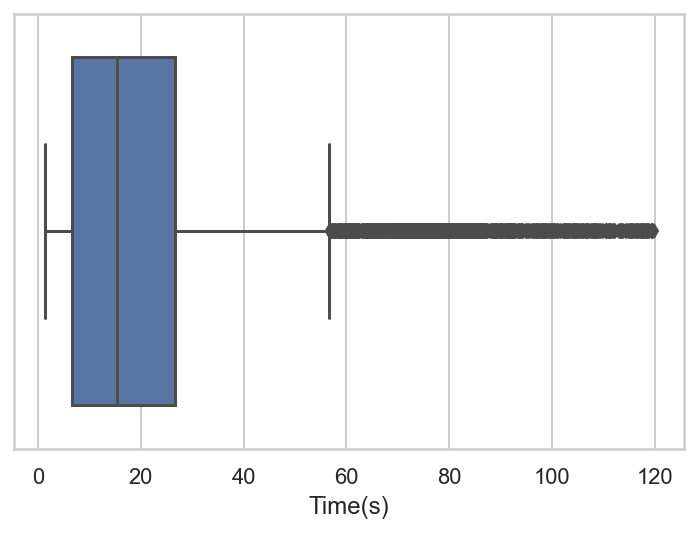

In [568]:
data=[]
time_limit=2*60
dataset="dataset1"

print("Best config for GeneticNDS elitism")
configs=calculateBest("GeneticNDSAlgorithm",'elitism',dataset,time_limit,onlyResult=True)
#print(configs)
alg=AlgorithmData(configs[0],configs[1],configs[2],configs[3],configs[4],configs[5],configs[6],configs[7],configs[8],configs[9],configs[10])
data.append(alg)

print("Best config for GeneticNDS elitismNDS")
configs=calculateBest("GeneticNDSAlgorithm",'elitismnds',dataset,time_limit,onlyResult=True)
#print(configs)
alg=AlgorithmData(configs[0],configs[1],configs[2],configs[3],configs[4],configs[5],configs[6],configs[7],configs[8],configs[9],configs[10])
data.append(alg)

print("Best config for NSGAII elitism")
configs=calculateBest("NSGAIIAlgorithm",'elitism',dataset,time_limit,onlyResult=True)
#print(configs)
alg=AlgorithmData(configs[0],configs[1],configs[2],configs[3],configs[4],configs[5],configs[6],configs[7],configs[8],configs[9],configs[10])
data.append(alg)

#data.append(AlgorithmData(calculateBest("GeneticNDSAlgorithm",'elitismnds',"dataset1",2*60, onlyResult=True)))
#data.append(AlgorithmData(calculateBest("NSGAIIAlgorithm",'elitism',"dataset1",2*60, onlyResult=True)))
calculateStarChart(data,dataset,time_limit,onlyResult=True)

## Dataset 2

In [502]:
data=[]
time_limit=10*60
dataset="dataset2"

print("Best config for GeneticNDS elitism")
configs=calculateBest("GeneticNDSAlgorithm",'elitism',dataset,time_limit,onlyResult=True)
#print(configs)
alg=AlgorithmData(configs[0],configs[1],configs[2],configs[3],configs[4],configs[5],configs[6],configs[7],configs[8],configs[9],configs[10])
data.append(alg)

print("Best config for GeneticNDS elitismNDS")
configs=calculateBest("GeneticNDSAlgorithm",'elitismnds',dataset,time_limit,onlyResult=True)
#print(configs)
alg=AlgorithmData(configs[0],configs[1],configs[2],configs[3],configs[4],configs[5],configs[6],configs[7],configs[8],configs[9],configs[10])
data.append(alg)

print("Best config for NSGAII elitism")
configs=calculateBest("NSGAIIAlgorithm",'elitism',dataset,time_limit,onlyResult=True)
#print(configs)
alg=AlgorithmData(configs[0],configs[1],configs[2],configs[3],configs[4],configs[5],configs[6],configs[7],configs[8],configs[9],configs[10])
data.append(alg)

#data.append(AlgorithmData(calculateBest("GeneticNDSAlgorithm",'elitismnds',"dataset1",2*60, onlyResult=True)))
#data.append(AlgorithmData(calculateBest("NSGAIIAlgorithm",'elitism',"dataset1",2*60, onlyResult=True)))
calculateStarChart(data,dataset,time_limit,onlyResult=True)

Best config for GeneticNDS elitism


,,,,,,,,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing
Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,,,,,,,,
40,100,tournament,2,onepoint,0.85,flip1bit,0.0,170.092258,92787.62,0.993735,0.692034,0.72951,42.1,37.2,0.094301


Best config for GeneticNDS elitismNDS


,,,,,,,,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing
Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,,,,,,,,
20,100,tournament,2,onepoint,0.6,flip1bit,0.2,915.043974,106838.56,0.990575,0.891492,1.198377,76.4,61.2,0.175506


Best config for NSGAII elitism


,,,,,,,,mean_time,mean_hv,mean_spread,mean_avgvalue,mean_bestavgvalue,mean_bestgeneration,mean_numsolutions,mean_spacing
Population Length,Generations,Selection Scheme,Selection Candidates,Crossover Scheme,Crossover Probability,Mutation Scheme,Mutation Probability,,,,,,,,
40,300,tournament,2,onepoint,0.6,flipeachbit,0.05,283.884904,287517.34,0.93098,0.811971,1.118622,255.3,39.9,0.269212


HV              0.099596
Spread          0.552486
Spacing         0.162521
NumSolutions    0.287912
AvgValue        0.235703
Time(s)         0.276810
dtype: float64

HV              0.048064
Spread          0.537708
Spacing         0.227854
NumSolutions    0.356044
AvgValue        0.355364
Time(s)         0.533693
dtype: float64

HV              0.471380
Spread          0.482956
Spacing         0.620085
NumSolutions    0.317582
AvgValue        0.404639
Time(s)         0.468355
dtype: float64